Copyright 2020 Dale Bowman, Natasha A. Sahr, Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Classification with LDA and KNN

The classification problem involves the training of a _classifier_ to determine to which of several groups a new observation vector should be assigned.
There are many different types of classifiers can be trained.

The difference between classification and clustering is simple.
In clustering, the grouping in the dataset is unknown or latent and we are searching for these unknown patterns in the data.
In classification, we have a dataset where the grouping is known and want to use that information to build a tool to classify a new object whose group is unknown. 

Clustering is an _unsupervised_ method since the correct classes are unknown.
Classification is a _supervised_ method since the classes are known. 

We will look at two commonly used classifiers: __linear discriminant analysis__ (LDA) and $\mathbf{k}$__-nearest neighbors__ (KNN).

## What you will learn

In this notebook you will learn about the problem of classification and how you can use your data to train a classifier that can be used to determine the class of a new observation.  We will study the following:

- Linear discriminant analysis (LDA)
- k nearest neighbor
- Confusion matrices

## When to use classifiers

Classification is useful when you have a set of annotated data.  That is, for each set of features the true class is known.  In this case you can use the data to train a classifier so that when a new set of features is encountered with unknown class, you are able to infer its class from its features.

## Linear Discriminant Analysis

Suppose we have response variable $Y$ which can belong to one of $C$ different categories (classes).
Associated with $Y$ is a set of features, $\mathbf{X}$. For each of the $C$ categories there is associated a __prior probability__ of belonging to that class, denoted $\pi_i$ for$i=1,\dots,C$.
If no information is known about the class probabilities, we can set $\pi_1=\pi_2=\cdots=\pi_C$.
For each category of $Y$, there is an associated _density function_, $f_i(\mathbf{x}) = P(\mathbf{X} = \mathbf{x}| Y=i)$.
That is $f_i(\mathbf{x})$ is the probability that $Y$ is in category $i$ given the observed $\mathbf{X}$.
The probability $f_i(\mathbf{x})$ will be relatively high if $Y$ is in class $i$ and relatively low if $Y$ is in another category.

To find the probability that $Y$ is in class $k$ given the value of observed vector $\mathbf{X}$ we use _Bayes Theorem_ which states that 

$$Pr(Y=k|\mathbf{X}= \mathbf{x}) = \frac{\pi_k f_k(\mathbf{x})}{\sum_{i=1}^C \pi_i f_i(\mathbf{x})}.$$

We assign $Y$ to the class with the highest probability.
The probability $Pr(Y=k|\mathbf{X}= \mathbf{x})$ is called a __posterior probability__.
In general, we won't know the value of the prior probabilities, $\pi_i$'s, or the form of the density functions, $f_i(\mathbf{x})$.

### When $p=1$

The LDA classifier can be illustrated when there is only one feature ($p=1$).
For this case, LDA assumes a _normal_ (or Gaussian) distribution for $f_i(\mathbf{x})$.
The general equation for the normal density is 

$$f_i(x) = \frac{1}{\sqrt{2 \pi \sigma_i^2}} \exp \left( \frac{1}{2 \sigma_i^2} (x-\mu_i)^2 \right).$$

In the normal distribution, $\mu_i$ is the __mean__ (measuring central tendency) and $\sigma_i^2$ is the __variance__ (measuring dispersion).
It is symmetric about the mean.

The LDA classifier makes a further assumption that the variances are equal across categories, i.e. $\sigma_1^2=\sigma_2^2=\cdots=\sigma_C^2=\sigma^2$.
If this assumption is not reasonable, a _quadratic discriminant analysis_ can be used.
Using the normal model the posterior probability becomes, 

$$P(Y=k|X=x) = \frac{ \pi_k \exp \left(\frac{1}{2\sigma^2} (x-\mu_k)^2\right)}{\sum_{i=1}^C \pi_i \exp \left(\frac{1}{2\sigma^2} (x-\mu_i)^2\right)}$$

A new observation with feature value $x_0$ is classified into the category for which this probability is the biggest.
If we take the log of this equation and drop some common terms, this is equivalent to choosing to assign $x_0$ to the category for which $\delta_k$ is largest, for 

$$\delta_k(x) = x_0 \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log(\pi_k).$$

We can illustrate the LDA classifier for the case where $K=2$ and $\pi_1=\pi_2=0.5$ in Figure 1 below. The <font color="red"> red line is a normal distribution with $\mu = - 1.25$ and $\sigma^2 = 1$</font> and the <font color="blue"> blue line is a normal distribution with $\mu = 1.25$ and  $\sigma^2 = 1$</font>. The black line ($x = 0$) shows the _decision boundary_ found using the LDA classifier. The response, $Y$, will be classified into: 
- <font color="red"> the red group for values of $X < 0$</font>; and,
- <font color="blue"> blue group for values of $X > 0$</font>.

<!-- __Figure 1__ -->

<!-- <body>
    <div class="img-box">
        <img src="images/lda-1.jpg" alt="img1" style="width:100%" />
    </div>
</body> -->
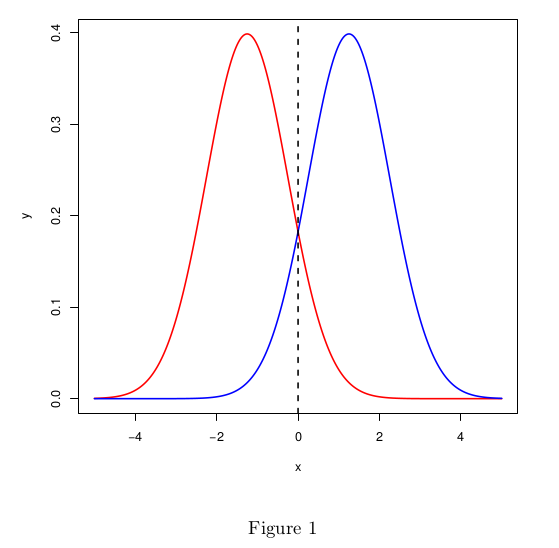

Of course, in practice we don't know the population mean or variance of the $C$ classes, so we estimate these parameters from the training data.
We use the sample means within each category to estimate the $\mu_i$'s and the sample variance $S^2$ using all the data to estimate the common variance $\sigma^2$.
We can estimate the prior probabilities using the proportions of responses in each category in our training data.
For example, if we have 20 observations in category 1 and a total of 100 observations, we would estimate $\pi_1$ as $\frac{20}{100} = 0.2$.

For the case where $p>2$, the LDA is constructed similarly using a multivariate normal distribution.
This distribution assumes that each of the $p$ features in the observation vector, $X$, has a normal distribution and it takes into account any linear relationships between the features using the correlation between them.

### LDA Programming Example

The `iris.csv` dataset contains 5 variables:

| Variable    | Type    | Description           |
|:-------------|:---------|:-----------------------|
| SepalLength | Ratio   | the sepal length (cm) |
| SepalWidth  | Ratio   | the sepal width (cm)  |
| PetalLength | Ratio   | the petal length (cm) |
| PetalWidth  | Ratio   | the petal width (cm)  |
| Species     | Nominal | the flower species    |

Let's load it into a dataframe.
First the import:

- `import pandas as pd`

In [10]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/%IFN5#t2uAm}E`8:KV:">pd</variable></variables><block type="importAs" id="_@5-r*j4E`}d?=DXLinf" x="16" y="10"><field name="libraryName">pandas</field><field name="libraryAlias" id="/%IFN5#t2uAm}E`8:KV:">pd</field></block></xml>

Now load the dataframe:

- Create variable `dta_iris`
- Set it to `with pd do read_csv using "datasets/iris.csv"`
- `dta_iris` (to display)

In [11]:
dta_iris = pd.read_csv('datasets/iris.csv')

dta_iris

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="$]iZob4!ow3s#WD~l+*A">dta_iris</variable><variable id="/%IFN5#t2uAm}E`8:KV:">pd</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="11" y="186"><field name="VAR" id="$]iZob4!ow3s#WD~l+*A">dta_iris</field><value name="VALUE"><block type="varDoMethod" id="ny0sjvqTnn2B]K2za7Li"><field name="VAR" id="/%IFN5#t2uAm}E`8:KV:">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/iris.csv</field></block></value></block></value></block><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B" x="8" y="304"><field name="VAR" id="$]iZob4!ow3s#WD~l+*A">dta_iris</field></block></xml>

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


We need an additional library for LDA called `numpy`, which is a widely-used math library:

- `import numpy as np`

In [12]:
import numpy as np

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable></variables><block type="importAs" id="6{E|A)Ya_2{hXV^n,QJP" x="16" y="10"><field name="libraryName">numpy</field><field name="libraryAlias" id="Zhzp)s*VL?V@ES3(j:*b">np</field></block></xml>

#### Labeling the data

Remember that when we do classification, we tell the program what the right answer is.
Thinking about it in terms of clusters, in classification, we tell the computer what the clusters are and then it has to learn how to make those clusters.
That's why classification is called supervised learning.

This is the opposite of clustering where we ask the computer to discover the clusters for us. That's why clustering is called unsupervised learning.

To be clear, there are many other kinds of supervised and unsupervised learning that we will talk about in the future.
Classification and clustering are just some examples.

To label the data, we need to tell the program the names of the clusters (more often called categories) that we want.

To do this, we're going to split our dataframe into two pieces:

- Everything but the labels
- The labels by themselves

Let's start with everything but the labels:

- Create variable `X`
- Set it to `dta_iris [ ] ` and put inside it the following in a list
    - `"SepalLength"`
    - `"SepalWidth"`
    - `"PetalLength"`
    - `"PetalWidth"`
- `X` (to display)

**Note: Use `{dictVariable} []` in LISTS and change to `dta_iris [ ] `**

In [13]:
X = dta_iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]

X

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="py,.kr!f9i=.v7I5_d+^">X</variable><variable id="$]iZob4!ow3s#WD~l+*A">dta_iris</variable></variables><block type="variables_set" id="46~F|Y~BiXd|Vok0}p,p" x="33" y="69"><field name="VAR" id="py,.kr!f9i=.v7I5_d+^">X</field><value name="VALUE"><block type="indexer" id="p,##xUo8Nj3`vpMVBjr8"><field name="VAR" id="$]iZob4!ow3s#WD~l+*A">dta_iris</field><value name="INDEX"><block type="lists_create_with" id="a.wA7Xdx%GbQ)t#XDKvV"><mutation items="4"></mutation><value name="ADD0"><block type="text" id="aZG|GLqavO~,RXBOcuJ+"><field name="TEXT">SepalLength</field></block></value><value name="ADD1"><block type="text" id="b/mW9(0w,rS.ny;Y(]5A"><field name="TEXT">SepalWidth</field></block></value><value name="ADD2"><block type="text" id="4yc?!4pnBI1/rSBQ41!t"><field name="TEXT">PetalLength</field></block></value><value name="ADD3"><block type="text" id="2biSAqV~ba^2sL^FlfyH"><field name="TEXT">PetalWidth</field></block></value></block></value></block></value></block><block type="variables_get" id="W]bu*LAe{2;n#?+7WQ-[" x="30" y="219"><field name="VAR" id="py,.kr!f9i=.v7I5_d+^">X</field></block></xml>

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Now do the same thing with `Species` but save in `Y`.
You may wish to copy your blocks above and modify:

- Create variable `Y`
- Set it to `dta_iris [ ] ` containing the following in a list
    - `"Species"`
- `Y` (to display)

In [14]:
Y = dta_iris[['Species']]

Y

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="@83Gxqb{/h|%%9Yr?2q!">Y</variable><variable id="$]iZob4!ow3s#WD~l+*A">dta_iris</variable></variables><block type="variables_set" id="46~F|Y~BiXd|Vok0}p,p" x="33" y="69"><field name="VAR" id="@83Gxqb{/h|%%9Yr?2q!">Y</field><value name="VALUE"><block type="indexer" id="p,##xUo8Nj3`vpMVBjr8"><field name="VAR" id="$]iZob4!ow3s#WD~l+*A">dta_iris</field><value name="INDEX"><block type="lists_create_with" id="a.wA7Xdx%GbQ)t#XDKvV"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="aZG|GLqavO~,RXBOcuJ+"><field name="TEXT">Species</field></block></value></block></value></block></value></block><block type="variables_get" id="W]bu*LAe{2;n#?+7WQ-[" x="30" y="219"><field name="VAR" id="@83Gxqb{/h|%%9Yr?2q!">Y</field></block></xml>

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


Now we're going to introduce a new idea, **train/test data splitting**.
This is a bit like sampling from a dataframe, which we've already done, but instead of sampling just a few rows, we randomize all the rows (like shuffling a deck of cards) and then split the rows into two new dataframes (like splitting a deck of cards).

The reason for this is that we want to keep some of the data from the classifier so that we can test the classifier on data its never seen.
We do this because we are not interested in whether the classifier can memorize the data; we want to see if the classifier can **generalize** to new data.

So next we are going to split our `X` and `Y` into train and test sets. 
That means we'll end up with four data frames: `Xtrain`, `Xtest`, `Ytrain`, `Ytest`.

First, the import for splitting:

- `import sklearn.model_selection as model_selection`

In [15]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="uASGz64Zb$AOvQyV4pRj">model_selection</variable></variables><block type="importAs" id="sN1YO5FEzpHyxb31@j,Z" x="16" y="10"><field name="libraryName">sklearn.model_selection</field><field name="libraryAlias" id="uASGz64Zb$AOvQyV4pRj">model_selection</field></block></xml>

Now do the splits:

- Create variable `splits`
- Set it to `with model_selection do train_test_split using` a list containing
    - `X` (the features in an array)
    - `Y` (the labels in an array)
    - freestyle `test_size=0.2` (the proportion of the dataset to include in the test split)
    
<!-- The resulting object will have 4 names: `X_train, X_test, Y_train, Y_test`.  -->

In [17]:
splits = model_selection.train_test_split(X, Y, test_size=0.2)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable><variable id="uASGz64Zb$AOvQyV4pRj">model_selection</variable><variable id="py,.kr!f9i=.v7I5_d+^">X</variable><variable id="@83Gxqb{/h|%%9Yr?2q!">Y</variable></variables><block type="variables_set" id="oTGRJ#{R!U^we@Bl@pkT" x="31" y="224"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field><value name="VALUE"><block type="varDoMethod" id="f?j@ker(a#hJv;Nh)IGX"><field name="VAR" id="uASGz64Zb$AOvQyV4pRj">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="INPUT"><block type="lists_create_with" id="er6r2]}|nA;1;}VsM5I7"><mutation items="3"></mutation><value name="ADD0"><block type="variables_get" id=".mm}`*H4)i%Eq5z={e-$"><field name="VAR" id="py,.kr!f9i=.v7I5_d+^">X</field></block></value><value name="ADD1"><block type="variables_get" id="I3dOV;CPBf^~E%BvgthZ"><field name="VAR" id="@83Gxqb{/h|%%9Yr?2q!">Y</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="@Hg?ib/!8fH$;f3pWJy2"><field name="CODE">test_size=0.2</field></block></value></block></value></block></value></block></xml>

`splits` is actually a list that contains four dataframes:  `Xtrain`, `Xtest`, `Ytrain`, and `Ytest`.

Take a look at `Xtrain`:

- `in list splits get # 1` (in menu LISTS)

In [18]:
splits[0]

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="lists_getIndex" id="4+/u48,dnx9B6buR/^{s" x="8" y="392"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="=;czY:o^AM7^+*f1rr8I"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="]1|M.P|wo?(_*@5jCfXG"><field name="NUM">1</field></block></value></block></xml>

,SepalLength,SepalWidth,PetalLength,PetalWidth
18,5.7,3.8,1.7,0.3
98,5.1,2.5,3.0,1.1
57,4.9,2.4,3.3,1.0
75,6.6,3.0,4.4,1.4
90,5.5,2.6,4.4,1.2
...,...,...,...,...
117,7.7,3.8,6.7,2.2
126,6.2,2.8,4.8,1.8
76,6.8,2.8,4.8,1.4
138,6.0,3.0,4.8,1.8


Now do the same for `Ytrain`:

- `in list splits get # 3`

In [19]:
splits[2]

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="lists_getIndex" id="4+/u48,dnx9B6buR/^{s" x="8" y="392"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="=;czY:o^AM7^+*f1rr8I"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="]1|M.P|wo?(_*@5jCfXG"><field name="NUM">3</field></block></value></block></xml>

,Species
18,setosa
98,versicolor
57,versicolor
75,versicolor
90,versicolor
...,...
117,virginica
126,virginica
76,versicolor
138,virginica


Notice that `Xtrain` and `Ytrain` have the same number of rows and that their indexes (i.e. IDs) match, which they must, since each training example must have both features (the variables we are using to predict) and a label (the variable we are trying to predict).

If you displayed `Xtest` and `Ytest`, you would see a similar correspondence for the remaining rows in `iris.csv`.

<!-- NOTE: scaling seems unnecessary: https://stats.stackexchange.com/questions/109071/standardizing-features-when-using-lda-as-a-pre-processing-step

We need to scale the features so `SepalWidth`, `SepalLength`, `PetalLength`, and `PetalWidth` are on the same scale. To do this, we need to from `sklearn.preprocessing` import the `StandardScaler` function. -->

<!-- # from sklearn.preprocessing import StandardScaler -->

<!-- Since `SepalWidth`, `SepalLength`, `PetalLength`, and `PetalWidth` are in `X_train` and `X_test`, we will transform both. 

First, use the function `fit_transform` with the object `X_train` on `StandardScaler()`. Rename the object `X_train1`. 

Next, use the function `fit_transform` with the object `X_test` on `StandardScaler()`. Rename the object `X_test1`.  -->

<!-- X_train1 = StandardScaler().fit_transform(X_train)
X_test1 = StandardScaler().fit_transform(X_test) -->

We're almost ready to run the LDA, but first, we have to import the library for LDA:

- `import sklearn.discriminant_analysis as da`

In [8]:
import sklearn.discriminant_analysis as da

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="t#|IDvUc9z_$x]MRbwQb">da</variable></variables><block type="importAs" id=":PRm%S%Z/GaCW^6TfKmk" x="143" y="258"><field name="libraryName">sklearn.discriminant_analysis</field><field name="libraryAlias" id="t#|IDvUc9z_$x]MRbwQb">da</field></block></xml>

The next step is to define the model:

- Create variable `lda_iris`
- Set it to `with da create LinearDiscriminantAnalysis using` a list containing
    - freestyle `n_components=1`
    
The parameter `n_components` refers to the number of linear discriminates we want to retrieve.

In [9]:
lda_iris = da.LinearDiscriminantAnalysis(n_components=1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K7CpTCUg}g[G.]s[(-@c">lda_iris</variable><variable id="t#|IDvUc9z_$x]MRbwQb">da</variable></variables><block type="variables_set" id="YKGK8q}oHC2L?9R.[4t!" x="-58" y="266"><field name="VAR" id="K7CpTCUg}g[G.]s[(-@c">lda_iris</field><value name="VALUE"><block type="varCreateObject" id="}QuzQLcR5iE|*j7`Cf;6"><field name="VAR" id="t#|IDvUc9z_$x]MRbwQb">da</field><field name="MEMBER">LinearDiscriminantAnalysis</field><data>da:LinearDiscriminantAnalysis</data><value name="INPUT"><block type="lists_create_with" id="Yjx!q**Yny(IJC9]60c#"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock" id="4JrrM7#xYy=;S5F{s5Dk"><field name="CODE">n_components=1</field></block></value></block></value></block></value></block></xml>

And now we train the model.
Remember that `splits` contains `Xtrain`, `Xtest`, `Ytrain`, and `Ytest`,
so we want the first and third elements (`Xtrain` and `Ytrain`):

<!-- - Create variable `lda_iris_fit` -->
-  `with lda_iris do fit using` a list containing
    - `in list splits get # 1` (in menu LISTS)
    - `with np do ravel using` a list containing
        - `in list splits get # 3` (in menu LISTS)
    
`ravel` is just a conversion function that turns our `Ytrain` dataframe into a list, which is what `fit` wants.

In [10]:
lda_iris.fit(splits[0], np.ravel(splits[2]))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K7CpTCUg}g[G.]s[(-@c">lda_iris</variable><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod" id="Z)$q-zn.KTC{+^l-wH6u" x="259" y="169"><field name="VAR" id="K7CpTCUg}g[G.]s[(-@c">lda_iris</field><field name="MEMBER">fit</field><data>lda_iris:fit</data><value name="INPUT"><block type="lists_create_with" id="e_B;36VOJ^lH70V=aWY}"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="C#,#1*rEm+]qEx?L1x[L"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="b_Sz{9#d7d=ystO|k?l_"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id=":s{r1~S,,@.CSh#9`$R;"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="varDoMethod" id="zYBlZ,!^P^%Ib5R@Ch.H"><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="INPUT"><block type="lists_create_with" id="9s({WSn={~Ink.5O+6Cc"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="^)UBt0jM;BnGmWeG7pw*"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="4Vo!*g]qQ=D}XtD2i39/"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="RysCD3.C27sBxztz(T}2"><field name="NUM">3</field></block></value></block></value></block></value></block></value></block></value></block></xml>

LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

Our goal is `classification`, so the final step is to predict class labels.
However, instead of using the training data, we will use the test data:

- Create variable `lda_iris_predict`
- Set it to `with lda_iris do predict using` a list containing
    - `in list splits get # 2`  (this is `Xtest`)
- `lda_iris_predict` (to display)

In [11]:
lda_iris_predict = lda_iris.predict(splits[1])

lda_iris_predict

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="|:at^Zvntr4oK/2tOxcg">lda_iris_predict</variable><variable id="K7CpTCUg}g[G.]s[(-@c">lda_iris</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="variables_set" id="NHw$/HH988vNLbZgn)CM" x="88" y="212"><field name="VAR" id="|:at^Zvntr4oK/2tOxcg">lda_iris_predict</field><value name="VALUE"><block type="varDoMethod" id="N}3ds6:i%0MtTA:(2im4"><field name="VAR" id="K7CpTCUg}g[G.]s[(-@c">lda_iris</field><field name="MEMBER">predict</field><data>lda_iris:predict</data><value name="INPUT"><block type="lists_create_with" id="3Ru6U*^.a`oD7$bu/I%y"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="@lpyN+:CEcPQ#Q:Svm|9"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="ng))4fZyb@U1|eswo1}:"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="Lo)w=2LL|Tf-L/gkeTdT"><field name="NUM">2</field></block></value></block></value></block></value></block></value></block><block type="variables_get" id="I#4y[,+*#I5s;b;h3o/M" x="75" y="307"><field name="VAR" id="|:at^Zvntr4oK/2tOxcg">lda_iris_predict</field></block></xml>

array(['versicolor', 'setosa', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica'], dtype='<U10')

To be clear, `lda_iris_predict` contains the predictions of `Species` from data the classifier has never seen before, which is exactly what we're interested in.

For this particular classifier, LDA, remember that it is calculating the class probabilities for each item (each row of the dataframe), then selecting the class with the highest probability.

We can access this information too by using `predict_proba`:

- `with lda_iris do predict_proba using` a list containing
    - `in list splits get # 2` (again, this is `Xtest`)

In [12]:
lda_iris.predict_proba(splits[1])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K7CpTCUg}g[G.]s[(-@c">lda_iris</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod" id="N}3ds6:i%0MtTA:(2im4" x="219" y="404"><field name="VAR" id="K7CpTCUg}g[G.]s[(-@c">lda_iris</field><field name="MEMBER">predict_proba</field><data>lda_iris:predict_proba</data><value name="INPUT"><block type="lists_create_with" id="3Ru6U*^.a`oD7$bu/I%y"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="@lpyN+:CEcPQ#Q:Svm|9"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="ng))4fZyb@U1|eswo1}:"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="Lo)w=2LL|Tf-L/gkeTdT"><field name="NUM">2</field></block></value></block></value></block></value></block></xml>

array([[7.47874246e-19, 9.99999484e-01, 5.15586193e-07],
       [1.00000000e+00, 5.68795373e-23, 9.50685325e-45],
       [5.42807590e-36, 2.86574368e-03, 9.97134256e-01],
       [1.58986001e-30, 1.58668657e-01, 8.41331343e-01],
       [1.00000000e+00, 1.10493273e-16, 9.80409807e-37],
       [2.03848143e-45, 5.89309541e-07, 9.99999411e-01],
       [1.00000000e+00, 4.15737873e-19, 3.34254023e-40],
       [3.46768439e-38, 3.48995674e-04, 9.99651004e-01],
       [1.00000000e+00, 2.47276952e-20, 8.02854149e-42],
       [2.30393420e-34, 2.04824546e-01, 7.95175454e-01],
       [1.39891627e-30, 2.15762070e-01, 7.84237930e-01],
       [3.95062653e-14, 9.99999971e-01, 2.90553288e-08],
       [2.79326005e-28, 9.68213059e-01, 3.17869409e-02],
       [1.78307791e-47, 9.82064239e-07, 9.99999018e-01],
       [1.00000000e+00, 3.25450406e-19, 2.04655682e-39],
       [3.62682279e-24, 9.99666320e-01, 3.33680362e-04],
       [5.03570776e-44, 1.21907674e-04, 9.99878092e-01],
       [2.89523477e-44, 6.93397

Notice that for each prediction (a row) we have three probabilities that sum up to 1, corresponding to the three different `iris` species.

We now have performed all steps to train and predict classes with an LDA classifier. 

## $k$-Nearest Neighbor

The $k$-nearest neighbor (KNN) method of classification is also based on the posterior probabilities of the response being in a category given the observed vectors.
The difference is in how this probability is estimated.
For a given value of $K$ and a new observation vector, $x_0$, first the $K$ observation vectors in the data set that are nearest to $x_0$ are found.
Out of this set of $k$ vectors, the posterior probability of class $j$ is found by counting the number of the $K$ nearest neighbors that are in class $j$ divided by $K$.
The new observation vector, $x_0$, is then classified into the class with the highest posterior probability.

The choice of $K$ has a great impact on the KNN classifier.
When $K$ is low, the classifier tends to be overly flexible, while for $K$ too high the classifier becomes less flexible and will make more mistakes.
If we use a part of the data to train the classifier (_training data set_) and then test it on the rest of the data (_test data set_), then for $K$ too low, you will get low error rates on the training set but you may get very high error rates on the test set.
This implies the classifier has been _over fit_.
On the other hand if $K$ is too high the error rate on the training set will be too low and will not be useful for classification.

### $k$-Nearest Neighbor Programming Example

We will use the same `iris.csv` dataset as in the LDA example. Recall, data has already been pre-processed for use. We will use the same `splits`, which contains `Xtrain`, `Xtest`, `Ytrain`, and `Ytest`.

First, the imports:

- `import sklearn.neighbors as neighbors`

In [14]:
import sklearn.neighbors as neighbors

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="~%[Y}a{Syr+LrQ[I8?d(">neighbors</variable></variables><block type="importAs" id="ayw$B{(evWs,ynm/fP%g" x="123" y="313"><field name="libraryName">sklearn.neighbors</field><field name="libraryAlias" id="~%[Y}a{Syr+LrQ[I8?d(">neighbors</field></block></xml>

And like before, we need to create the model before we can train it:

- Create variable `knnclass_iris`
- Set it to `with neighbors create KNeighborsClassifier using` a list containing
    - freestyle `n_neighbors=5`
    
This last block means we will use 5 neighbors, which is the most commonly used value for the KNN algorithm. 

In [15]:
knnclass_iris = neighbors.KNeighborsClassifier(n_neighbors=5)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="v*s@3P0*L$$a5zXg/doB">knnclass_iris</variable><variable id="~%[Y}a{Syr+LrQ[I8?d(">neighbors</variable></variables><block type="variables_set" id="`z.|tb|jX$Y2a5;iN{pz" x="-7" y="283"><field name="VAR" id="v*s@3P0*L$$a5zXg/doB">knnclass_iris</field><value name="VALUE"><block type="varCreateObject" id="9i7]OHHOnhf2~MjH^n+y"><field name="VAR" id="~%[Y}a{Syr+LrQ[I8?d(">neighbors</field><field name="MEMBER">KNeighborsClassifier</field><data>neighbors:KNeighborsClassifier</data><value name="INPUT"><block type="lists_create_with" id="`.s=9G`sj;R8,?u+OR9Y"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock" id="R*)t!8POzxw3}@cy,{:]"><field name="CODE">n_neighbors=5</field></block></value></block></value></block></value></block></xml>

Next we need to train the classifier. 
Remember the first and third elements in `splits` are `Xtrain` and `Ytrain`, respectively:

-  `with knnclass_iris do fit using` a list containing
    - `in list splits get # 1` (in menu LISTS)
    - `with np do ravel using` a list containing
        - `in list splits get # 3` (in menu LISTS)
    
Again, `ravel` is just a conversion function that turns our `Ytrain` dataframe into a list, which is what `fit` wants.

You're probably already noticing at this point the similarities with training LDA.
This is common - in a library like `sklearn`, similar operations (here training a model) will look the same.
So once you know how to train one model, you know how to train them all (for the most part, the parameters in `using` will change depending on the model).

In [16]:
knnclass_iris.fit(splits[0], np.ravel(splits[2]))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="v*s@3P0*L$$a5zXg/doB">knnclass_iris</variable><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod" id="Z)$q-zn.KTC{+^l-wH6u" x="259" y="169"><field name="VAR" id="v*s@3P0*L$$a5zXg/doB">knnclass_iris</field><field name="MEMBER">fit</field><data>knnclass_iris:fit</data><value name="INPUT"><block type="lists_create_with" id="e_B;36VOJ^lH70V=aWY}"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="C#,#1*rEm+]qEx?L1x[L"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="b_Sz{9#d7d=ystO|k?l_"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id=":s{r1~S,,@.CSh#9`$R;"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="varDoMethod" id="zYBlZ,!^P^%Ib5R@Ch.H"><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="INPUT"><block type="lists_create_with" id="9s({WSn={~Ink.5O+6Cc"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="^)UBt0jM;BnGmWeG7pw*"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="4Vo!*g]qQ=D}XtD2i39/"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="RysCD3.C27sBxztz(T}2"><field name="NUM">3</field></block></value></block></value></block></value></block></value></block></value></block></xml>

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

As before, the final step is to predict classes with the test data:

- Create variable `knnclass_iris_predict`
- Set it to `with knnclass_iris do predict using` a list containing
    - `in list splits get # 2` 
- `knnclass_iris_predict` (to display)

In [17]:
knnclass_iris_predict = knnclass_iris.predict(splits[1])

knnclass_iris_predict

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="ncGGT,BZ;BN9i_h*KC4U">knnclass_iris_predict</variable><variable id="v*s@3P0*L$$a5zXg/doB">knnclass_iris</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="variables_set" id="NHw$/HH988vNLbZgn)CM" x="88" y="212"><field name="VAR" id="ncGGT,BZ;BN9i_h*KC4U">knnclass_iris_predict</field><value name="VALUE"><block type="varDoMethod" id="N}3ds6:i%0MtTA:(2im4"><field name="VAR" id="v*s@3P0*L$$a5zXg/doB">knnclass_iris</field><field name="MEMBER">predict</field><data>knnclass_iris:predict</data><value name="INPUT"><block type="lists_create_with" id="3Ru6U*^.a`oD7$bu/I%y"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="@lpyN+:CEcPQ#Q:Svm|9"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="ng))4fZyb@U1|eswo1}:"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="Lo)w=2LL|Tf-L/gkeTdT"><field name="NUM">2</field></block></value></block></value></block></value></block></value></block><block type="variables_get" id="I#4y[,+*#I5s;b;h3o/M" x="75" y="307"><field name="VAR" id="ncGGT,BZ;BN9i_h*KC4U">knnclass_iris_predict</field></block></xml>

array(['versicolor', 'setosa', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor'], dtype=object)

We now have performed all steps to train and predict classes with an KNN classifier. 

## Assessing the Classifier

Consider for a moment a classifier that always predicted species `versicolor`.
It wouldn't be very smart right?
You certainly wouldn't need any data to train it.
However, even this "dumb" classifier would be right 33% of the time, because `versicolor` is the correct class for 33% of the data.
We could make another "dumb" classifier by choosing from `versicolor`, `setosa`, and `virginica` randomly; it would also be right 33% of the time in this case.

These "dumb" classifiers illustrate why it is important to assess classifier performance.
If we don't do this extra step, we don't know if the classifier is working well or at all.
In general, people agree that if a classifier is no better than random or always choosing the same class, it isn't working at all.

To assess the performance of a classifier, we need to look at the mistakes it makes, starting with its **confusion matrix.**

### Confusion Matrix

For simplicity, consider a classifier where the response variable has only two classes, say positive (1) and negative (0). 
An example for this might be a test for coronavirus: either you get a positive test or a negative test.

A _confusion matrix_ is a tool to evaluate the predictive value of the classifier. 
The table below is an example of a confusion matrix for a two category classifier.

<!-- __Figure 2__ -->

<!-- 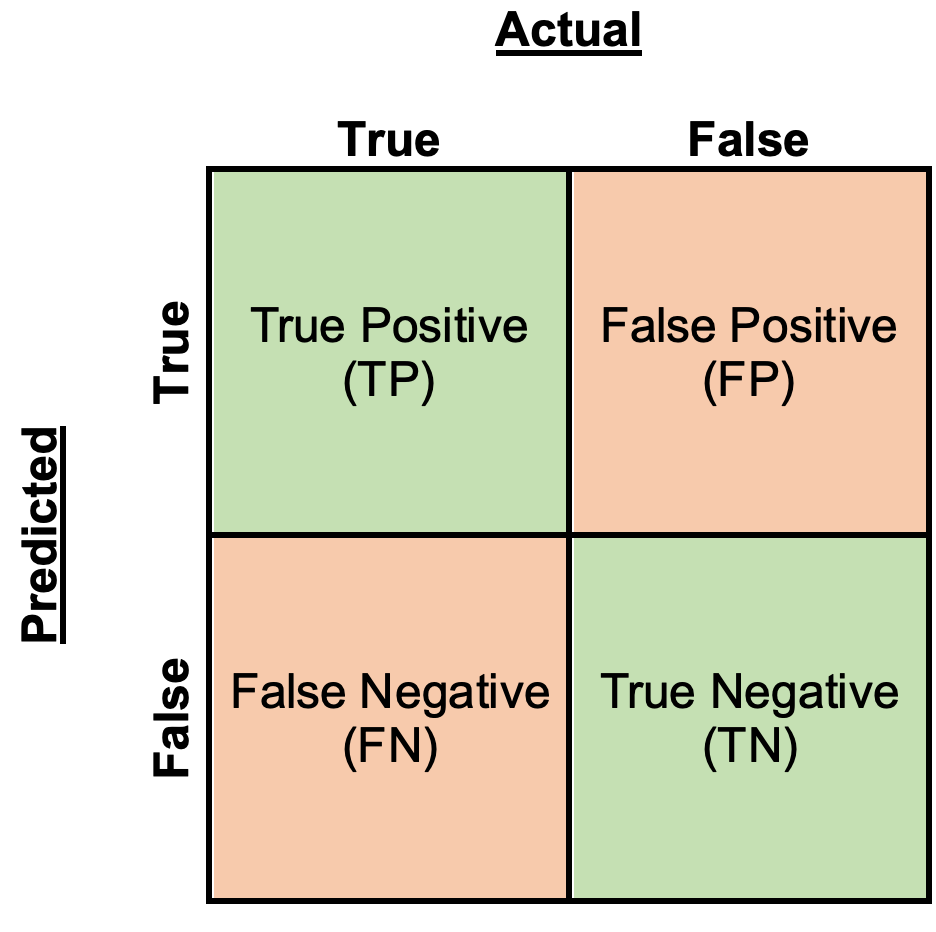 -->
<div>
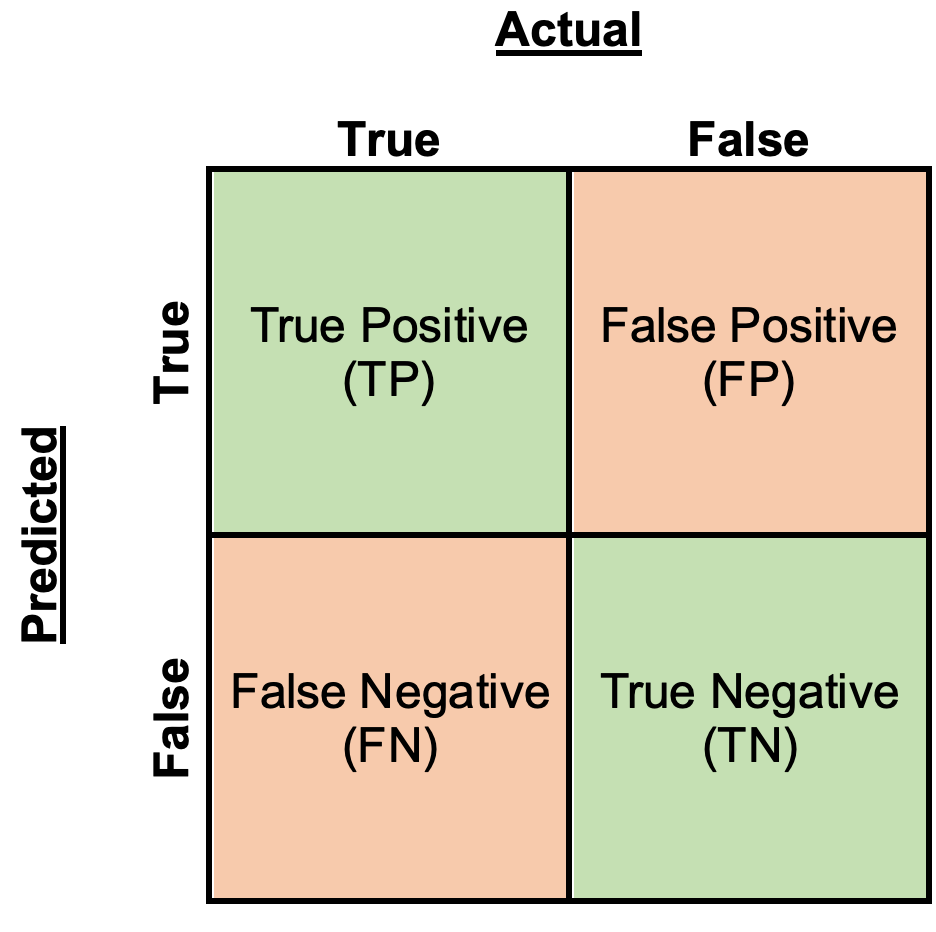
</div>

**Figure 2**

A prediction is a true positive (TP) if the actual value was positive and the classifier predicted it to be positive. 
A prediction is a true negative (TN) if the actual value was negative and the classifier predicted it to be negative. 
TP and TN are correct predictions and should be large for a _good classifier_. 

A prediction is a false positive (FP) if the actual response was negative and the predicted response was positive. 
A prediction is a false negative (FN) if the actual response was positive and the classifier predicted it to be negative. 
FP and FN are errors and should be small for a _good classifier_. 

To summarize this, there are two ways to be right and two ways to be wrong.
The two ways to be right are TP and TN: saying something (e.g. the virus) is there when it's there, and saying something isn't there when it isn't there.
The two ways to be wrong are FP and FN: staying something is there when it isn't, and saying something isn't there when it is.

<!-- This is good, but I already wrote the above when I saw it and don't have time to combine -->

<!-- Consider a medical setting for evaluating diagnostic tests. TP is the number of people that have the disease and the test correctly showed that they have the disease. TN is the number of people that don’t have the disease and the test correctly says they don’t. FP is the number of people who do not have the disease but the test incorrectly predicts that they do and FN is the number of people who do have the disease but the test predicts they don’t. -->

While the four corners of the confusion matrix are useful by themselves, we can also construct metrics using them.
The most well-known metric is **accuracy** which is $TP+TN$ divided by the sum of everything in the matrix (how many times were you right divided by all the classifications you made). 

There are some additional measures used to assess classifiers in addition to accuracy, each of which highlights a different part of the classifier's performance.

The **sensitivity** also called **recall** is defined as the ratio of true positive to total number of actual positives, $\frac{TP}{TP+FN}$. 
In our disease example, sensitivity is the number of times we correctly said positive divided by then number of times the disease was present.
The sensitivity will be between 0 and 1. 
The better the classifier, the larger the sensitivity.

The **specificity**  is a similar measure for the negative response. 
It is the ratio of true negative to the total number of actual negatives, $\frac{TN}{TN+FP}$. 
In our disease example, specificity is the number of times we correctly said negative divided by then number of times the disease was *not* present.
The specificity is also between 0 and 1. 
The better the classifier, the larger the specificity. 

A measure of the error that is often used is the _false discovery rate_ (FDR). 
The FDR measures how many of the actual negative responses were predicted as positive by the classifier, $FDR = \frac{FP}{FP+TN} = 1 - \text{specificity}$. 
The better the classifier, the smaller the FDR. 

It is possible to construct confusion matrices for situations where there are more than two classes but the specificity, sensitivity and FDR are defined differently.

An expanded graphic is in Figure 3. 
<!-- Not sure what is meant by missing, so cutting for now -->
<!-- Can you spot the metric missing? -->

<!-- __Figure 3__ -->

<!-- 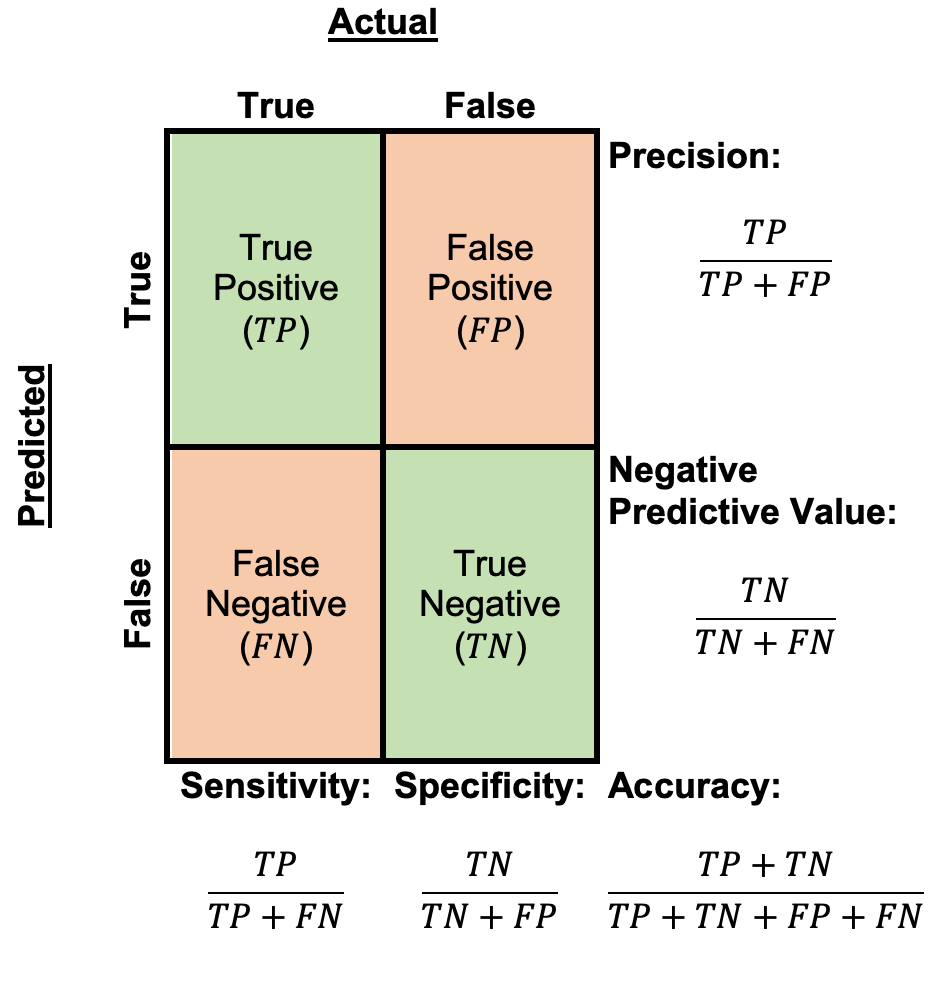 -->
<div>
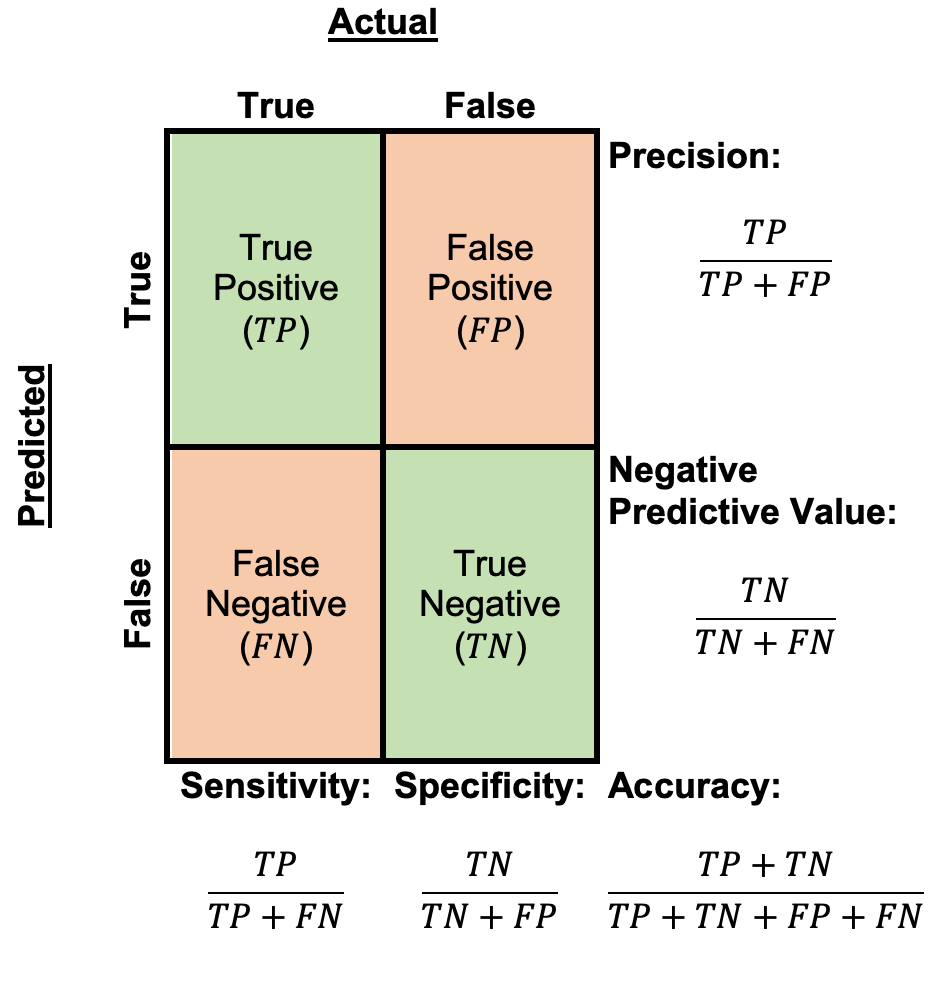
</div>

**Figure 3**

### LDA Programming Example cont.

Now that we know about confusion matrices, let's evaluate the performance of the LDA classifier for our test dataset. 
To do this, we only need two things:

- `Ytest` (the class labels from our test data split)
- `lda_iris_predict` (our class label predictions from our LDA model)

First, the imports for computing performance metrics:

- `import sklearn.metrics as metrics`

<!-- We first need to import `confusion_matrix`, `classification_report`, and `accuracy_score` from `sklearn.metrics`. -->

In [18]:
import sklearn.metrics as metrics

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="C8HQ^p):qDkQA/nhxe{{">metrics</variable></variables><block type="importAs" id="|1fEPj_#9:@0Qa@y|1F." x="135" y="207"><field name="libraryName">sklearn.metrics</field><field name="libraryAlias" id="C8HQ^p):qDkQA/nhxe{{">metrics</field></block></xml>

Let's start with the confusion matrix:

- `with metrics do confusion_matrix using` a list containing
    - `in list splits get # 4`  (this is `Ytest`)
    - `lda_iris_predict`

In [19]:
metrics.confusion_matrix(splits[3], lda_iris_predict)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="C8HQ^p):qDkQA/nhxe{{">metrics</variable><variable id="|:at^Zvntr4oK/2tOxcg">lda_iris_predict</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod" id="l,28Y;cf6Q.r-rTBWP4}" x="8" y="188"><field name="VAR" id="C8HQ^p):qDkQA/nhxe{{">metrics</field><field name="MEMBER">confusion_matrix</field><data>metrics:confusion_matrix</data><value name="INPUT"><block type="lists_create_with" id="`V^tbb51h?lxzH^Z,L0+"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="6Nb!QUCs+zcSbgi2=8Jb"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="0SesC-O%M@-rqWgnWJ[q"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="ZQBTZmCAMzn[;:irh:{@"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id=":5r(/A;QY|,.0/gzcHi."><field name="VAR" id="|:at^Zvntr4oK/2tOxcg">lda_iris_predict</field></block></value></block></value></block></xml>

array([[ 8,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 10]])

You can see that most of the big numbers are on the diagonal, which means that we are classifying most classes correctly.

However, it can be hard to read the confusion matrix, especially this one, when the rows and columns aren't labeled.
Let's look at some of the other metrics that are calculated with this confusion matrix.

To get the accuracy:

- `with metrics do accuracy_score using` a list containing
    - `in list splits get # 4`  (this is `Ytest`)
    - `lda_iris_predict`
    
As you no doubt noticed, this is very similar to calling `confusion_matrix`, so you might like to copy blocks from that to save some time.

In [20]:
metrics.accuracy_score(splits[3], lda_iris_predict)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="C8HQ^p):qDkQA/nhxe{{">metrics</variable><variable id="|:at^Zvntr4oK/2tOxcg">lda_iris_predict</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod" id="l,28Y;cf6Q.r-rTBWP4}" x="8" y="188"><field name="VAR" id="C8HQ^p):qDkQA/nhxe{{">metrics</field><field name="MEMBER">accuracy_score</field><data>metrics:accuracy_score</data><value name="INPUT"><block type="lists_create_with" id="`V^tbb51h?lxzH^Z,L0+"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="6Nb!QUCs+zcSbgi2=8Jb"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="0SesC-O%M@-rqWgnWJ[q"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="ZQBTZmCAMzn[;:irh:{@"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id=":5r(/A;QY|,.0/gzcHi."><field name="VAR" id="|:at^Zvntr4oK/2tOxcg">lda_iris_predict</field></block></value></block></value></block></xml>

0.9666666666666667

To get the recall and precision:

- `print with metrics do classification_report using` a list containing
    - `in list splits get # 4`  (this is `Ytest`)
    - `lda_iris_predict`
    
Again, you might like to copy blocks to save some time.
Notice this time we use `print` to get a pretty output.
If you ever get ugly output displaying text, try using `print`.

In [23]:
print(metrics.classification_report(splits[3], lda_iris_predict))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="C8HQ^p):qDkQA/nhxe{{">metrics</variable><variable id="|:at^Zvntr4oK/2tOxcg">lda_iris_predict</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="text_print" id="Sx0uF}9IfzkucZiyR^1:" x="196" y="360"><value name="TEXT"><shadow type="text" id="a=J{E!^,yE0MlS-rEKnT"><field name="TEXT">abc</field></shadow><block type="varDoMethod" id="l,28Y;cf6Q.r-rTBWP4}"><field name="VAR" id="C8HQ^p):qDkQA/nhxe{{">metrics</field><field name="MEMBER">classification_report</field><data>metrics:classification_report</data><value name="INPUT"><block type="lists_create_with" id="`V^tbb51h?lxzH^Z,L0+"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="6Nb!QUCs+zcSbgi2=8Jb"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="0SesC-O%M@-rqWgnWJ[q"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="ZQBTZmCAMzn[;:irh:{@"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id=":5r(/A;QY|,.0/gzcHi."><field name="VAR" id="|:at^Zvntr4oK/2tOxcg">lda_iris_predict</field></block></value></block></value></block></value></block></xml>

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.92      0.96        12
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Altogether, these results are really, really good.
Accuracy above 90% is generally considered very good, and the classification report shows that the classifier is working well for all three `iris` species.
This last point is important: it's possible to have a classifier with good overall accuracy that still doesn't work well for a particular class, so it's important to go into the detail of the classification report.

### $k$-Nearest Neighbor Programming Example cont

To evaluate the performance of our KNN classifier, we only need the same two things, `Ytest` and our class label predictions, `knnclass_iris_predict`.

Let's start with the confusion matrix:

- `with metrics do confusion_matrix using` a list containing
    - `in list splits get # 4`  (this is `Ytest`)
    - `knnclass_iris_predict`
    
*Copy blocks above to save time, but remember to change the variable names as appropriate*.

In [24]:
metrics.confusion_matrix(splits[3], knnclass_iris_predict)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="C8HQ^p):qDkQA/nhxe{{">metrics</variable><variable id="ncGGT,BZ;BN9i_h*KC4U">knnclass_iris_predict</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod" id="l,28Y;cf6Q.r-rTBWP4}" x="8" y="188"><field name="VAR" id="C8HQ^p):qDkQA/nhxe{{">metrics</field><field name="MEMBER">confusion_matrix</field><data>metrics:confusion_matrix</data><value name="INPUT"><block type="lists_create_with" id="`V^tbb51h?lxzH^Z,L0+"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="6Nb!QUCs+zcSbgi2=8Jb"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="0SesC-O%M@-rqWgnWJ[q"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="ZQBTZmCAMzn[;:irh:{@"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id=":5r(/A;QY|,.0/gzcHi."><field name="VAR" id="ncGGT,BZ;BN9i_h*KC4U">knnclass_iris_predict</field></block></value></block></value></block></xml>

array([[ 8,  0,  0],
       [ 0, 11,  1],
       [ 0,  1,  9]])

This looks about as good as LDA, maybe just a bit worse.

To get the accuracy:

- `with metrics do accuracy_score using` a list containing
    - `in list splits get # 4`  (this is `Ytest`)
    - `knnclass_iris_predict`

*Copy blocks above to save time, but remember to change the variable names as appropriate*.

In [25]:
metrics.accuracy_score(splits[3], knnclass_iris_predict)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="C8HQ^p):qDkQA/nhxe{{">metrics</variable><variable id="ncGGT,BZ;BN9i_h*KC4U">knnclass_iris_predict</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod" id="l,28Y;cf6Q.r-rTBWP4}" x="8" y="188"><field name="VAR" id="C8HQ^p):qDkQA/nhxe{{">metrics</field><field name="MEMBER">accuracy_score</field><data>metrics:accuracy_score</data><value name="INPUT"><block type="lists_create_with" id="`V^tbb51h?lxzH^Z,L0+"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="6Nb!QUCs+zcSbgi2=8Jb"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="0SesC-O%M@-rqWgnWJ[q"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="ZQBTZmCAMzn[;:irh:{@"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id=":5r(/A;QY|,.0/gzcHi."><field name="VAR" id="ncGGT,BZ;BN9i_h*KC4U">knnclass_iris_predict</field></block></value></block></value></block></xml>

0.9333333333333333

To get the recall and precision:

- `print with metrics do classification_report using` a list containing
    - `in list splits get # 4`  (this is `Ytest`)
    - `knnclass_iris_predict`
    
*Copy blocks above to save time, but remember to change the variable names as appropriate*.

In [26]:
print(metrics.classification_report(splits[3], knnclass_iris_predict))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="C8HQ^p):qDkQA/nhxe{{">metrics</variable><variable id="ncGGT,BZ;BN9i_h*KC4U">knnclass_iris_predict</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="text_print" id="Sx0uF}9IfzkucZiyR^1:" x="196" y="360"><value name="TEXT"><shadow type="text" id="a=J{E!^,yE0MlS-rEKnT"><field name="TEXT">abc</field></shadow><block type="varDoMethod" id="l,28Y;cf6Q.r-rTBWP4}"><field name="VAR" id="C8HQ^p):qDkQA/nhxe{{">metrics</field><field name="MEMBER">classification_report</field><data>metrics:classification_report</data><value name="INPUT"><block type="lists_create_with" id="`V^tbb51h?lxzH^Z,L0+"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="6Nb!QUCs+zcSbgi2=8Jb"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="0SesC-O%M@-rqWgnWJ[q"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="ZQBTZmCAMzn[;:irh:{@"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id=":5r(/A;QY|,.0/gzcHi."><field name="VAR" id="ncGGT,BZ;BN9i_h*KC4U">knnclass_iris_predict</field></block></value></block></value></block></value></block></xml>

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.92      0.92      0.92        12
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



With KNN, we see slightly worse performance than LDA overall, and also somewhat uneven performance across the three classes.
It's not the case that KNN is completely failing for some classes, but we would want to note that KNN may not be as good for some classes as others.

### ROC Curves

The __ROC curve__ is a way to plot the sensitivity and specificity of a classifier.

ROC stands for receiver operating characteristics, a term from communications theory.
Figure 4 below shows a typical ROC curve for a classifier.

ROC curves are useful for showing the tradeoffs between sensitivity and specificity.
We can always make a classifier more sensitive by biasing it to detect something (e.g. a disease).
However, if we do that, we are more likely to have false positives (FP) which makes our specificity go down.

ROC curves show us how sensitivity and specificity move together at different levels of bias.  

<!-- __Figure 4__ -->

<!-- <body>
    <div class="img-box">
        <img src="images/ROC-1.jpg" alt="img1" style="width:100%" />
    </div>
</body> -->
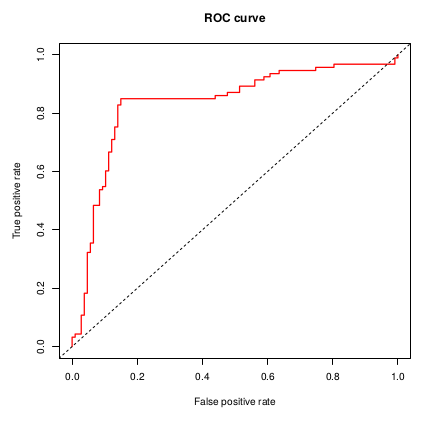

**Figure 4**

The ROC curve has the sensitivity on the vertical axis (y-axis) and 1-specificity (FDR) on the horizontal axis (x-axis).
The ideal ROC curve hugs the top left corner which corresponds to a high true positive rate and a low false positive rate.
The forty-five degree line that goes from bottom left (0,0) to upper right (1,1) shown as a black dotted line in the plot is considered to be a classifier that is no better than guessing i.e. the posterior probabilities are both 0.5.

A single number summary of the ROC curve is the _AUC_ which stands for area under the (ROC) curve.
The larger the AUC the better the classifier has done.
The forty-five degree line has an AUC of 0.50 so a good classifier will have AUC higher than random guessing.
For the ROC curve in Figure 4, the AUC is 0.8342.
This is a moderately good classifier, certainly better than random.

## Submit your work

When you have finished the notebook, please download it, log in to [OKpy](https://okpy.org/) using "Student Login", and submit it there.

Then let your instructor know on Slack.
